# Preparation

In [ ]:
!pip install tensorflow-hub

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from keras.optimizers import Adam

In [ ]:
data = pd.read_csv("/content/indonesia-violence-reporting-text.csv")

In [ ]:
features = data['Text']
target = data.drop(columns='Text')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.3,
                                                    shuffle = True,
                                                    random_state=42)

# Base Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2", 
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=True))
model.add(tf.keras.layers.Dense(1024,
                                activation='relu',
                                kernel_regularizer=regularizers.l2(0.01),
                                bias_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(8, activation='softmax'))
 
model.compile(optimizer='adam', 
              loss='binary_crossentropy')
 
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
 
history = model.fit(x_train, 
          y_train, 
          epochs=100, 
          validation_data=(x_test, y_test),
          callbacks = [callbacks]
)

Epoch 1/100
2/2 [==============================] - 4s 204ms/step - loss: 1.6237 - val_loss: 1.5290
Epoch 2/100
2/2 [==============================] - 0s 41ms/step - loss: 1.5053 - val_loss: 1.4229
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 1.3992 - val_loss: 1.3254
Epoch 4/100
2/2 [==============================] - 0s 44ms/step - loss: 1.3008 - val_loss: 1.2364
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 1.2121 - val_loss: 1.1563
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 1.1306 - val_loss: 1.0838
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 1.0577 - val_loss: 1.0196
Epoch 8/100
2/2 [==============================] - 0s 42ms/step - loss: 0.9945 - val_loss: 0.9626
Epoch 9/100
2/2 [==============================] - 0s 39ms/step - loss: 0.9372 - val_loss: 0.9107
Epoch 10/100
2/2 [==============================] - 0s 40ms/step - loss: 0.8868 - val_loss: 0.8637
Epoch 11/100
2/2 [

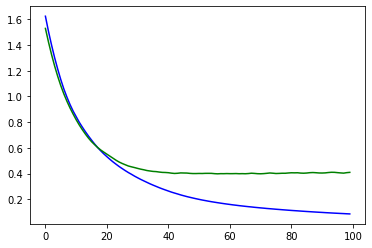

In [ ]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')

# Final Hidden Layer's Number of Neuron Tuning

In [ ]:
def fit_model(trainX, trainy, validX, validy, n_neuron):
  model = tf.keras.models.Sequential()
  model.add(hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2", 
                          input_shape=[], 
                          dtype=tf.string, 
                          trainable=True))
  model.add(tf.keras.layers.Dense(n_neuron,
                                  activation='relu',
                                  kernel_regularizer=regularizers.l2(0.01),
                                  bias_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dense(8, activation='softmax'))
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy')
  history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=100, verbose=0)

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title('neuron='+str(n_neuron))
  plt.legend()

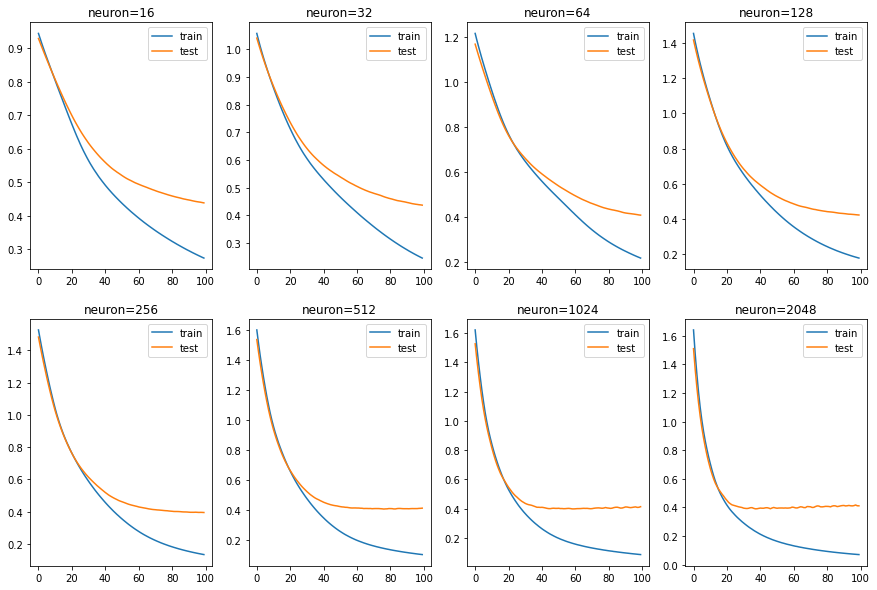

In [ ]:
n_neuron = [16, 32, 64, 128, 256, 512, 1024, 2048]

plt.figure(figsize=(15, 10))
for i in range(len(n_neuron)):
    plot_no = 240 + (i+1)
    plt.subplot(plot_no)
    fit_model(x_train, y_train, x_test, y_test, n_neuron[i])

plt.show()

# Kernel Regularizer Tuning

In [ ]:
def fit_model(trainX, trainy, validX, validy, n_kr):
  model = tf.keras.models.Sequential()
  model.add(hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2", 
                          input_shape=[], 
                          dtype=tf.string, 
                          trainable=True))
  model.add(tf.keras.layers.Dense(1024,
                                  activation='relu',
                                  kernel_regularizer=regularizers.l2(n_kr),
                                  bias_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dense(8, activation='softmax'))
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy')
  history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=100, verbose=0)

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title('kernel regularizer='+str(n_kr))
  plt.legend()

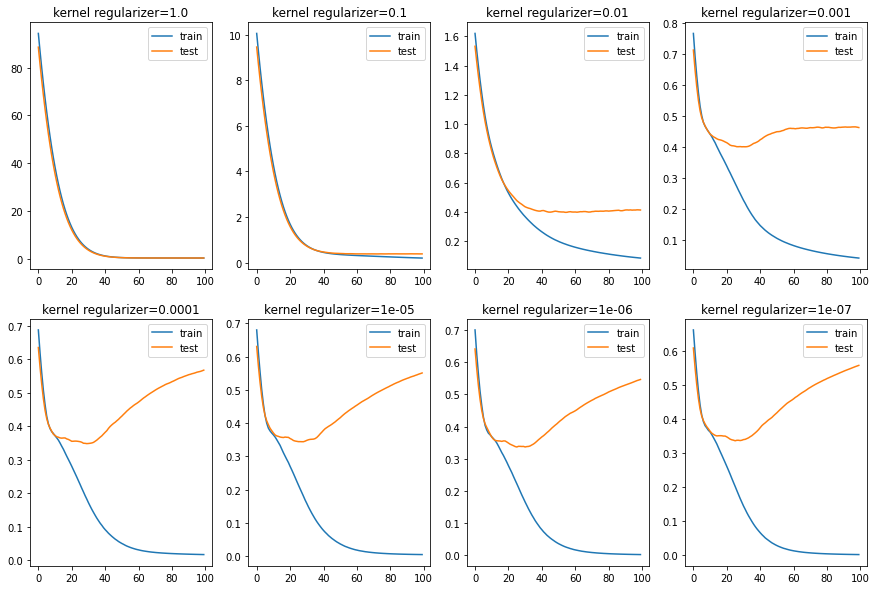

In [ ]:
n_kr = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

plt.figure(figsize=(15, 10))
for i in range(len(n_kr)):
    plot_no = 240 + (i+1)
    plt.subplot(plot_no)
    fit_model(x_train, y_train, x_test, y_test, n_kr[i])

plt.show()

# Bias Regularizer Tuning

In [ ]:
def fit_model(trainX, trainy, validX, validy, n_br):
  model = tf.keras.models.Sequential()
  model.add(hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2", 
                          input_shape=[], 
                          dtype=tf.string, 
                          trainable=True))
  model.add(tf.keras.layers.Dense(1024,
                                  activation='relu',
                                  kernel_regularizer=regularizers.l2(0.01),
                                  bias_regularizer=regularizers.l2(n_br)))
  model.add(tf.keras.layers.Dense(8, activation='softmax'))
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy')
  history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=100, verbose=0)

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title('bias regularizer='+str(n_br))
  plt.legend()

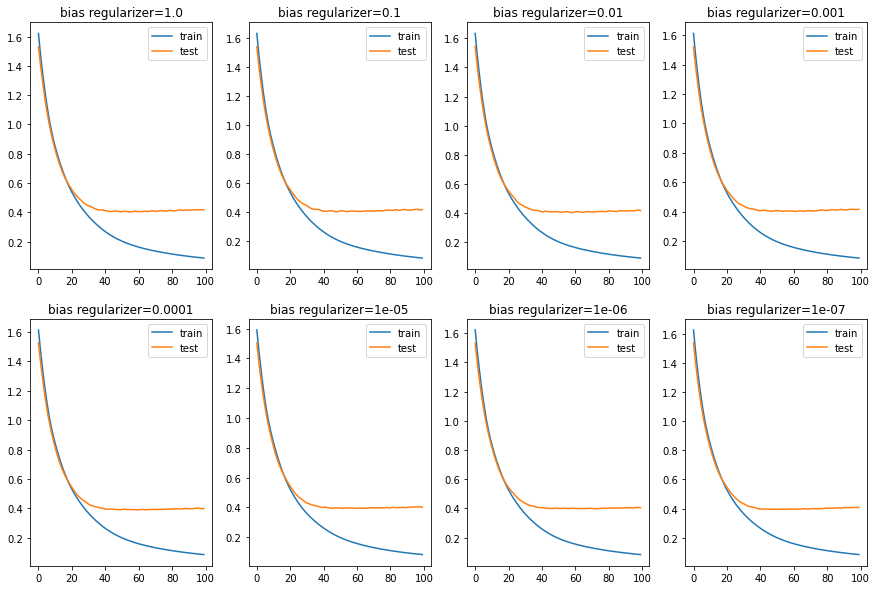

In [ ]:
n_br = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

plt.figure(figsize=(15, 10))
for i in range(len(n_br)):
    plot_no = 240 + (i+1)
    plt.subplot(plot_no)
    fit_model(x_train, y_train, x_test, y_test, n_br[i])

plt.show()

# Learning Rate Tuning

In [ ]:
def fit_model(trainX, trainy, validX, validy, n_lr):
  model = tf.keras.models.Sequential()
  model.add(hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2", 
                          input_shape=[], 
                          dtype=tf.string, 
                          trainable=True))
  model.add(tf.keras.layers.Dense(1024,
                                  activation='relu',
                                  kernel_regularizer=regularizers.l2(0.01),
                                  bias_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dense(8, activation='softmax'))
  opt = Adam(learning_rate=n_lr)
  model.compile(optimizer=opt, loss='binary_crossentropy')
  history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=100, verbose=0)

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title('learning rate='+str(n_lr))
  plt.legend()

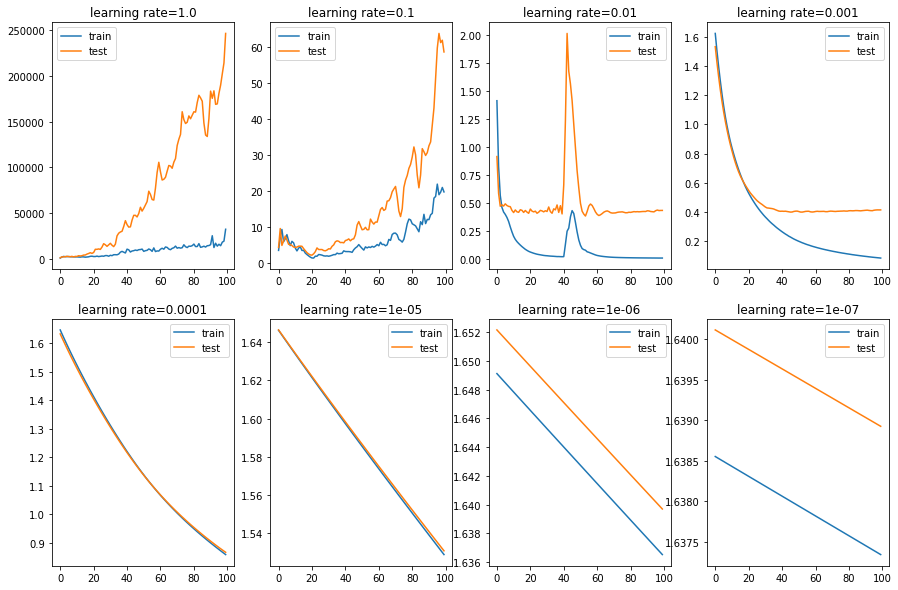

In [ ]:
n_lr = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

plt.figure(figsize=(15, 10))
for i in range(len(n_lr)):
    plot_no = 240 + (i+1)
    plt.subplot(plot_no)
    fit_model(x_train, y_train, x_test, y_test, n_lr[i])

plt.show()

# Best Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2", 
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=True))
model.add(tf.keras.layers.Dense(256,
                                activation='relu',
                                kernel_regularizer=regularizers.l2(0.01),
                                bias_regularizer=regularizers.l2(1e-05)))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy')

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

history = model.fit(x_train, 
          y_train, 
          epochs=1000, 
          validation_data=(x_test, y_test),
          callbacks = [callbacks]
)

Epoch 1/1000
2/2 [==============================] - 1s 177ms/step - loss: 1.5245 - val_loss: 1.4825
Epoch 2/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.4640 - val_loss: 1.4245
Epoch 3/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.4070 - val_loss: 1.3692
Epoch 4/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.3504 - val_loss: 1.3162
Epoch 5/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.2980 - val_loss: 1.2650
Epoch 6/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.2465 - val_loss: 1.2157
Epoch 7/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.1970 - val_loss: 1.1686
Epoch 8/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.1495 - val_loss: 1.1238
Epoch 9/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.1051 - val_loss: 1.0817
Epoch 10/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.0622 - val_loss: 1.0422
Epoch 11

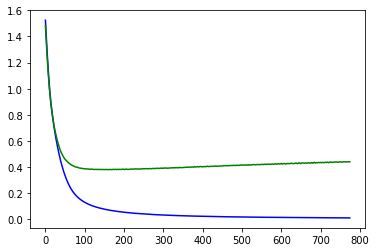

In [ ]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')

In [ ]:
import tempfile
import os

MODEL_DIR = tempfile.gettempdir()

version = 3

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/3/assets


INFO:tensorflow:Assets written to: /tmp/3/assets



export_path = /tmp/3
total 152
drwxr-xr-x 2 root root   4096 Jun  6 06:24 assets
-rw-r--r-- 1 root root   6902 Jun  6 06:24 keras_metadata.pb
-rw-r--r-- 1 root root 135432 Jun  6 06:24 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  6 06:24 variables


In [ ]:
# Paste this into the bash CLI bellow (without #)
# cd ../tmp
# zip -r model-3.zip 3

# The go to tmp and download model-3.zip

In [ ]:
! bash

bash: cannot set terminal process group (58): Inappropriate ioctl for device
bash: no job control in this shell
/content# cd ../tmp
/tmp# ls -l
total 64
drwxr-xr-x 4 root root 4096 Jun  6 06:24 3
-rw-r--r-- 1 root root 1436 Jun  6 06:14 dap_multiplexer.c3a604328b8d.root.log.INFO.20210606-061408.48
lrwxrwxrwx 1 root root   61 Jun  6 06:14 dap_multiplexer.INFO -> dap_multiplexer.c3a604328b8d.root.log.INFO.20210606-061408.48
srwxr-xr-x 1 root root    0 Jun  6 06:14 debugger_1zeaclqpx9
drwx------ 2 root root 4096 Jun  6 06:14 initgoogle_syslog_dir.0
drwxr-xr-x 2 root root 4096 Jun  6 06:24 __pycache__
drwxr-xr-x 3 root root 4096 Jun  6 06:22 tfhub_modules
-rw------- 1 root root 1080 Jun  6 06:24 tmp0nv5co2z.py
-rw------- 1 root root 5809 Jun  6 06:22 tmp7ymq82lr.py
-rw------- 1 root root 1007 Jun  6 06:24 tmpadqugqon.py
-rw------- 1 root root 2458 Jun  6 06:24 tmpc4rceyvb.py
-rw------- 1 root root 3541 Jun  6 06:22 tmpd9jyebg9.py
-rw------- 1 root root  481 Jun  6 06:24 tmpg97i3dw0.py
-rw-